# BCI homework

# Brain-Computer Interfaces (Fall 2017, ELE 594)
# Instructor: Yalda Shahriari

# 1st homework, 9/23/17 (The homework, is due by Oct 4, 11:55 pm).

# Instruction: 
Load the “sampleEEGdata” into your Matlab workspace. 
This EEG dataset contains 64 channels (EEG.nbchan), 640 time points (EEG.pnts), and 99 trials (EEG.trials). 
The time points in ms has been saved in EEG.times where you can see each trial has been started 
from -1000 ms and ends at ~1500 ms. 
Use the topoplot.m function for plotting the head plots. 
Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis. 

In [1]:
# Here are the functions, 
# which reconstructs the dictionaries just use this loadmat instead of scipy.io's loadmat:

import scipy.io as spio
import numpy as np

sampleEEGdata = spio.loadmat('sampleEEGdata.mat')  #.loa ('sampleEEGdata.mat')
# sampleEEGdata['EEG'][0, 0].dtype
eeg = sampleEEGdata['EEG'][0, 0]
eeg.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('spedata', 'O')])

In [2]:
# Use the topoplot.m function for plotting the head plots.
# Creating mne Objects from numpy arrays for Visualizing the epochs/ topomap plot
import mne as mne

labels = []
XYZs = []
eeg['chanlocs']['labels'][0, 0][0]
eeg['chanlocs']['labels'].shape[1]
for idx in range(eeg['chanlocs']['labels'].shape[1]):
    # channel labels or electrode labels
    label = eeg['chanlocs']['labels'][0, idx][0]
    #     print(label)
    labels.append(label)
    
    # channel location or electrode location
    X = eeg['chanlocs']['X'][0, idx][0][0]
    Y = eeg['chanlocs']['Y'][0, idx][0][0]
    Z = eeg['chanlocs']['Z'][0, idx][0][0]
    XYZs.append(np.array([X, Y, Z], dtype=float))

ch_location = np.array(XYZs, dtype=float) # channels or electrodes location
ch_names = labels # mat['ch_names'].tolist(): channels or electrodes names/ labels
dig_ch_pos = dict(zip(ch_names, ch_location))
montage = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)

sfreq = eeg['srate'][0, 0]

# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, ch_types='eeg', montage=montage, sfreq=sfreq)

# eeg['data'][0, 0, 0]: channels, time, epochs
data = eeg['data'].transpose(2, 0, 1) # epcohs/ trials, channels, time
# data.shape  # data : array, shape (n_epochs, n_channels, n_times)

tmin = eeg['xmin'][0, 0]
tmax = eeg['xmax'][0, 0]
picks = mne.pick_types(info=info, eeg=True)

# Visualizing the epochs/ topomap plot
epochs = mne.EpochsArray(data=data, info=info, tmin=tmin)

# Shrinking the data from 3 axis or 3 dim to 2 dim or getting rid of epochs/trials
evoked = epochs.average(picks=picks)
data2 = evoked.data
data2.shape

99 matching events found
0 projection items activated
0 bad epochs dropped


(64, 640)

In [3]:
# Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis.
% ls

.ipynb_checkpoints/           bci-hw1-Copy5.ipynb
Analyzing_Neural_Time_Series/ bci-hw1-Copy6.ipynb
Channel Description.txt*      bci-hw1-Copy7.ipynb
HW1.pdf                       bci-hw1-Copy8.ipynb
README                        bci-hw1-Copy9.ipynb
bci-hw1-Copy1.ipynb           bci-hw1.ipynb
bci-hw1-Copy10.ipynb          eloc64C2.txt*
bci-hw1-Copy11.ipynb          mne_examples/
bci-hw1-Copy2.ipynb           sampleEEGdata.mat*
bci-hw1-Copy3.ipynb           topoplot.m*
bci-hw1-Copy4.ipynb


# 2-

In [4]:
# a) Create a family of complex Morlet wavelets, ranging in frequencies from 2 Hz to 30 Hz in five steps. 
# Consider cycle as a fix number of 4 cycle.

freq: 2.0 cycles: 3 scale: 0.833333333333 M: 640 sampling rate: 256


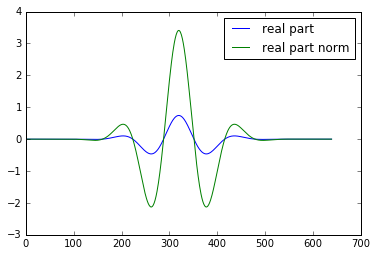

freq: 4.0 cycles: 3 scale: 1.66666666667 M: 640 sampling rate: 256


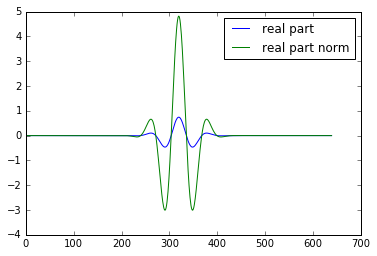

freq: 6.0 cycles: 3 scale: 2.5 M: 640 sampling rate: 256


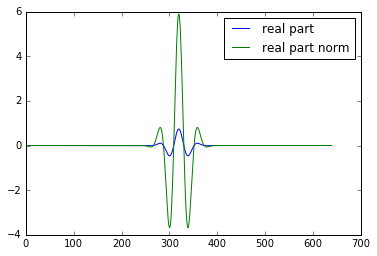

freq: 8.0 cycles: 3 scale: 3.33333333333 M: 640 sampling rate: 256


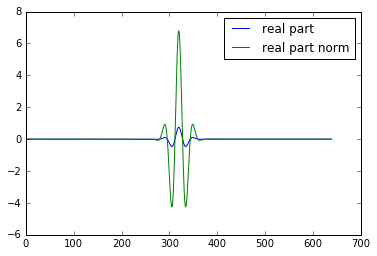

freq: 10.0 cycles: 3 scale: 4.16666666667 M: 640 sampling rate: 256


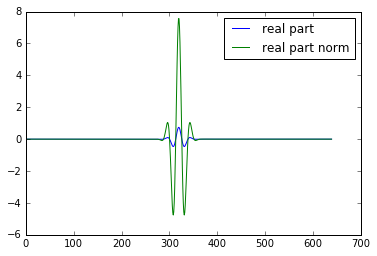

freq: 12.0 cycles: 3 scale: 5.0 M: 640 sampling rate: 256


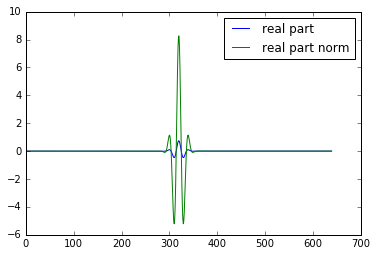

freq: 14.0 cycles: 3 scale: 5.83333333333 M: 640 sampling rate: 256


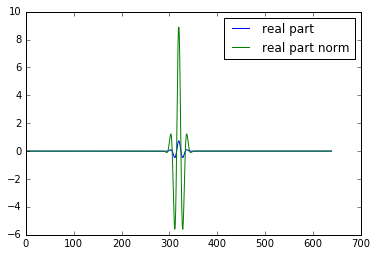

freq: 16.0 cycles: 3 scale: 6.66666666667 M: 640 sampling rate: 256


/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


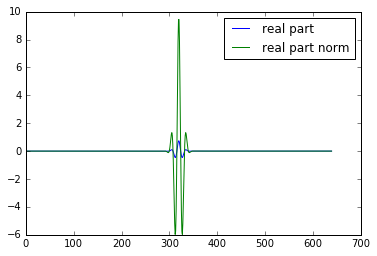

freq: 18.0 cycles: 3 scale: 7.5 M: 640 sampling rate: 256


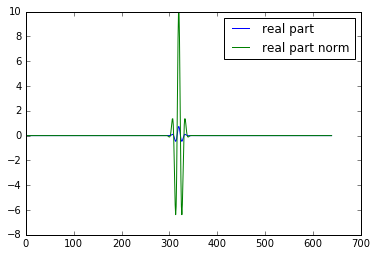

freq: 20.0 cycles: 3 scale: 8.33333333333 M: 640 sampling rate: 256


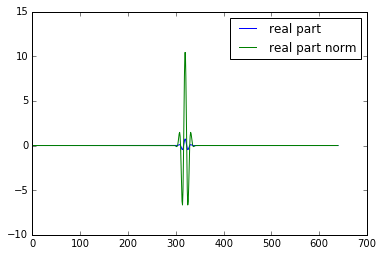

freq: 22.0 cycles: 3 scale: 9.16666666667 M: 640 sampling rate: 256


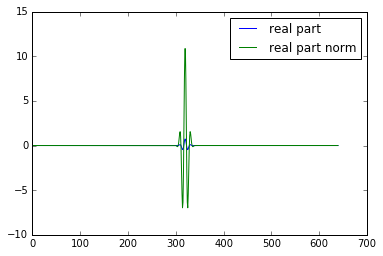

freq: 24.0 cycles: 3 scale: 10.0 M: 640 sampling rate: 256


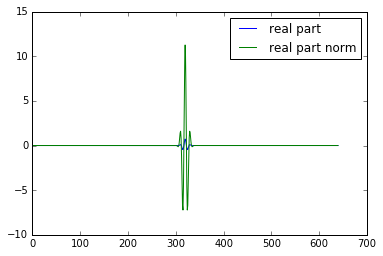

freq: 26.0 cycles: 3 scale: 10.8333333333 M: 640 sampling rate: 256


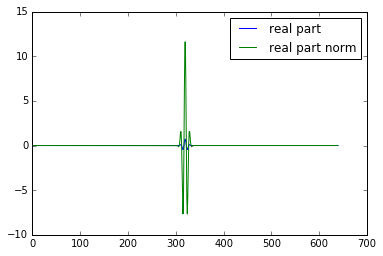

freq: 28.0 cycles: 3 scale: 11.6666666667 M: 640 sampling rate: 256


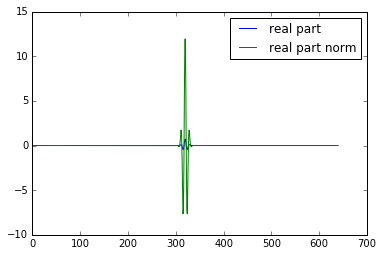

freq: 30.0 cycles: 3 scale: 12.5 M: 640 sampling rate: 256


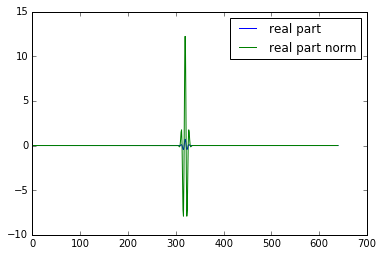

freq: 32.0 cycles: 3 scale: 13.3333333333 M: 640 sampling rate: 256


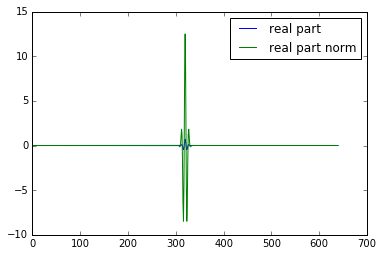

freq: 34.0 cycles: 3 scale: 14.1666666667 M: 640 sampling rate: 256


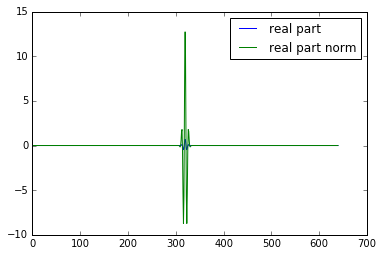

freq: 36.0 cycles: 3 scale: 15.0 M: 640 sampling rate: 256


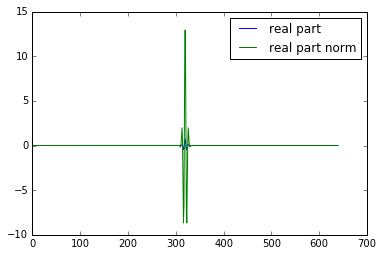

freq: 38.0 cycles: 3 scale: 15.8333333333 M: 640 sampling rate: 256


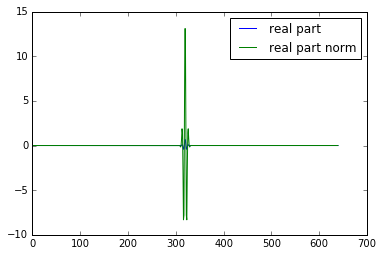

freq: 40.0 cycles: 3 scale: 16.6666666667 M: 640 sampling rate: 256


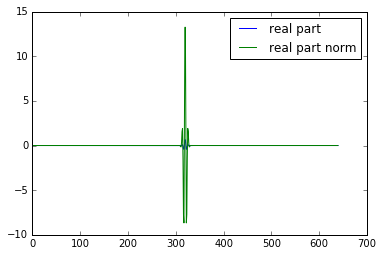

In [13]:
import scipy.signal as sp_signal
import matplotlib.pyplot as plt

# r: Sampling rate of EEG and the length of EEG signal
# M: number of points in a channel should be equal to the EEG signal length
# s: constant number of cycles -2*pi*s to +2*pi*s
# f: Wavelet freq for activity  pattern recognition
# w: The number of cycles/ period of the phase/real part
r, s, w, M, f = eeg['srate'][0, 0], 1.0, 3.0, data2.shape[1], 2
wavelet_bank = []

def normalize(X):
    return (X - X.mean(axis=0))/ X.std(axis=0)

# Wavelet frequencies from 2 Hz to 30 Hz: 7 choices, 28 = 7 * 4
# Number of cycles from 3 cycles to 10 cycles: 7 choices
# for w in range(3, 11, 1): # including 3 and 10
# f = (2*s*r*w)/ M
# for f in range(2, 42, 2): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
for step in range(0, 20, 1): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
    # f: 2 to 40, 38/19, step 2
    # W: 3 to 10,  7/19=0.35 step
#     w = 3 + ((7/19) * step) 
    w = 3 # number of cycles, discrete number
    f = 2.0 + ((38/19) * step)
    s = (f*M) / (2*w*r)
    print('freq:', f, 'cycles:', w, 'scale:', s, 'M:', M, 'sampling rate:', r)

    wavelet = sp_signal.morlet(M=M, w=w, s=s, complete=True)
    wavelet_bank.append(wavelet)

#     wavelet_norm = normalize(X=wavelet)
#     wavelet_bank.append(wavelet_norm)

    # Now calculate Amplitude & Phase
    A = ((wavelet.real**2) + (wavelet.imag**2))**0.5
    A_norm = normalize(X=A)
    P = np.arctan(wavelet.imag/wavelet.real) # imag=y, real=x
    P_norm = normalize(X=P)
    wavelet_real_norm = normalize(X=wavelet.real)
    wavelet_imag_norm = normalize(X=wavelet.imag)

    # plotting
    plt.plot(wavelet.real, label='real part')
#     plt.plot(wavelet.imag, label='imag part')
    plt.plot(wavelet_real_norm, label='real part norm')
#     plt.plot(wavelet_imag_norm, label='imag part norm')
#     plt.plot(A, label='Amplitude part')
#     plt.plot(A_norm, label='Amplitude part norm')
#     plt.plot(P, label='Phase part')
#     plt.plot(P_norm, label='Phase part norm')
    plt.legend()
    plt.show()

In [14]:
# b) Convolve each wavelet with EEG data from all electrodes and from only first trial 
# (hint: you can get the fft of both data and wavelet; multiply in the frequency domain, 
#  get ifft to return it back to the time domain, 
#  and then in order to make the convolved data the same length as the original data cut out the begging 
#  and the end of the convolved data with the cutting length equivalent to half of the wavelet length). 

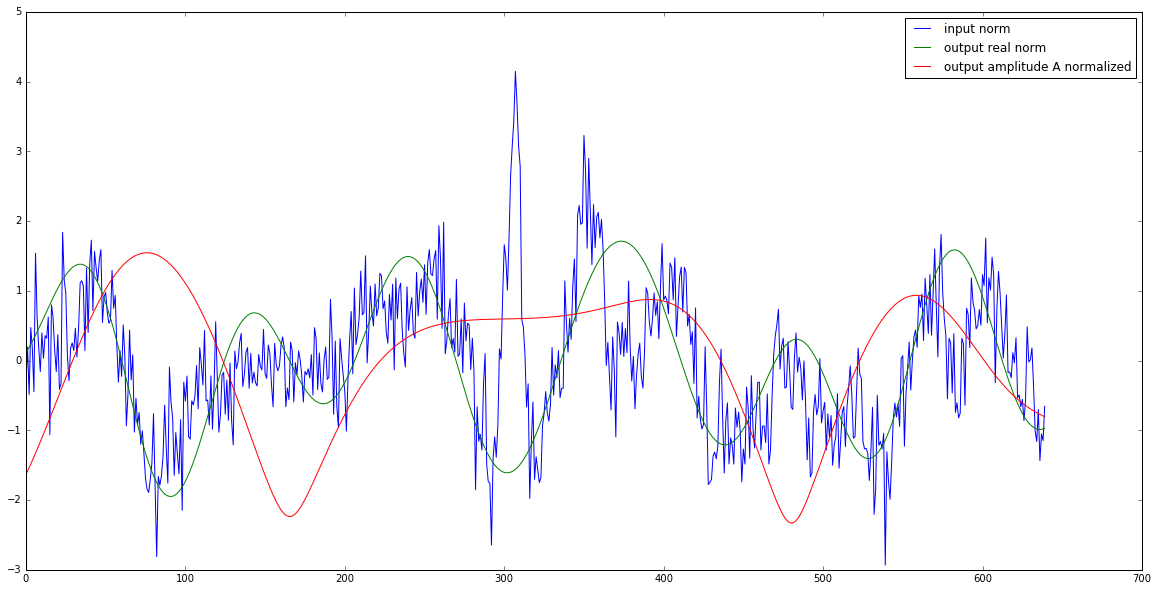

In [15]:
b = np.convolve(a=data2[0], mode='same', v=wavelet_bank[0])

# Now calculate Amplitude
A = ((b.real**2) + (b.imag**2))**0.5
A_norm = normalize(X=A)
b_real_norm = normalize(X=b.real)
P = np.arctan(b.imag/b.real) # imag=y, real=x
P_norm = normalize(X=P)

data2_norm = normalize(X=data2[0])

plt.figure(figsize=(20,10))
# plt.plot(data2[0], label='input')
plt.plot(data2_norm, label='input norm')
# plt.plot(b.real, label='output real')
plt.plot(b_real_norm, label='output real norm')
# plt.plot(b.imag, label='output imag')
# plt.plot(A, label='output amplitude A')
plt.plot(A_norm, label='output amplitude A normalized')
# plt.plot(P, label='output phase P')
plt.legend()
plt.show()

In [16]:
# c) Extract power and phase from the result of the complex wavelet convolution and store in a
# time x frequency x electrodes x power/phase matrix (thus, a 640 x 5 x 64 x 2 matrix).

In [17]:
data2.shape

(64, 640)

In [22]:
#  Convolving the data with one wavelet, extracting real and imag part and calculate 
# Amplitude for time domain patterns and 
# Phase for frequency domain patterns
data_KxAPxCxN = [] 


for each_wavelet in wavelet_bank:
    Amp, Phase, Amp_norm, Phase_norm = [], [], [], [] # Amplitude, Phase
    b_real, b_imag, b_real_norm, b_imag_norm = [], [], [], [] # convolved output
    
    data_APxCxN, Amp_norm, Phase_norm = [], [], [] 
    for each_ch in data2: # for all channels
        # Real and imaginary part of the complex output of convolution
        b = np.convolve(a=each_ch, mode='same', v=each_wavelet)
        b_real_norm = normalize(X=b.real)
        b_imag_norm = normalize(X=b.imag)
        
        # Amplitude and Phase of the complex output of convolution
        A = ((b.real**2) + (b.imag**2))**0.5
        A_norm = normalize(X=A)
        P = np.arctan(b.imag/b.real) # imag=y, real=x 
        P_norm = normalize(X=P)
        Amp_norm.append(A_norm)
        Phase_norm.append(P_norm)
        
    data_APxCxN.append(Amp_norm)
    data_APxCxN.append(Phase_norm)
    data_APxCxN = np.array(data_APxCxN)
    
    data_KxAPxCxN.append(data_APxCxN)
    
data_KxAPxCxN = np.array(data_KxAPxCxN)
data_KxAPxCxN.shape # kx2xCxN: (7, 2, 448, 640)

(20, 2, 64, 640)

In [22]:
# d) Make topographical plots of power and phase at 180 ms at all frequencies (hint: you may need
# to use the squeeze function to remove singleton dimensions).

# Arrange the plots in one figure with five columns for frequency and two rows for power/phase. 

# Put labels in the plot so it is clear which topographical maps correspond to which frequencies.

In [23]:
# e) Repeat step (d) for activity at 360 ms, and 650 ms.

# f) Are there any prominent topographical features in power or in phase? 

# Do these differ for different frequencies? 

# Do power and phase have similar topographical distributions? 

# Is there any reason to suspect that they might have similar or different topographies?

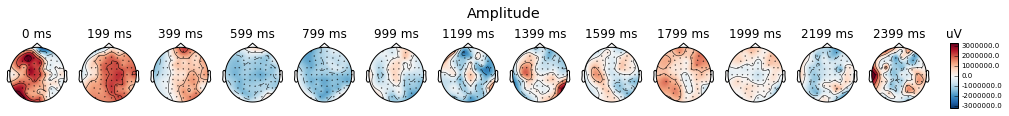

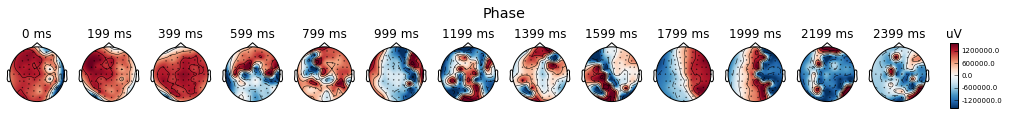

/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


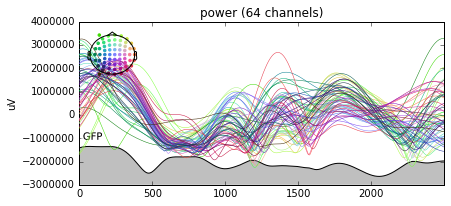

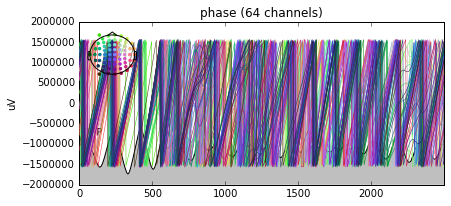

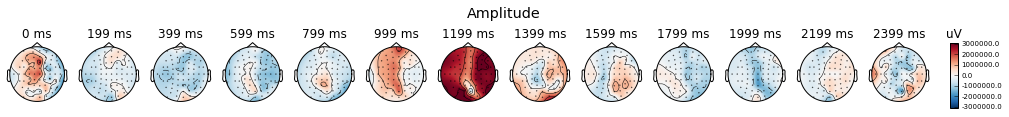

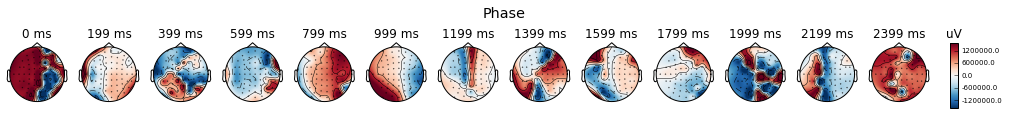

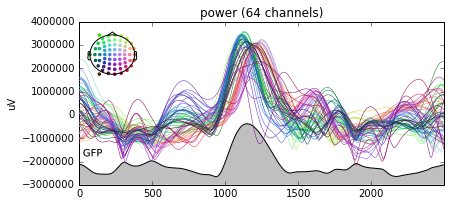

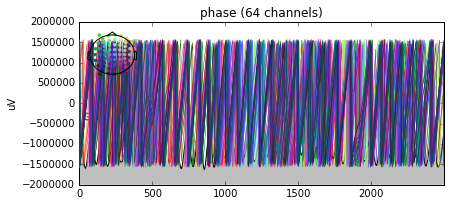

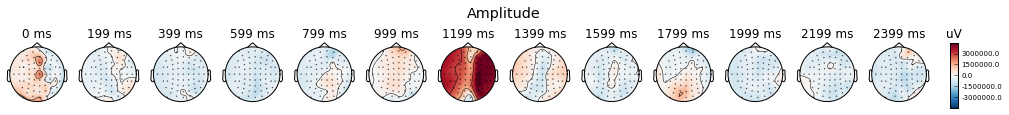

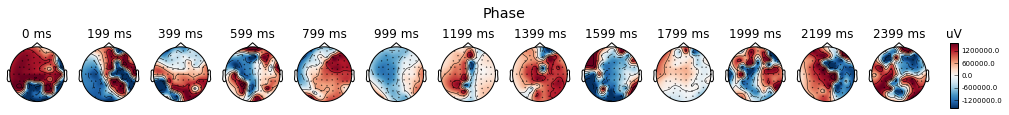

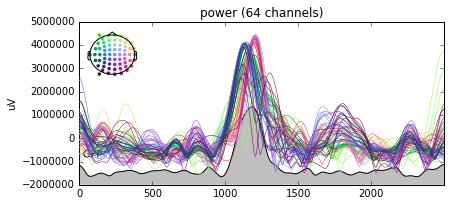

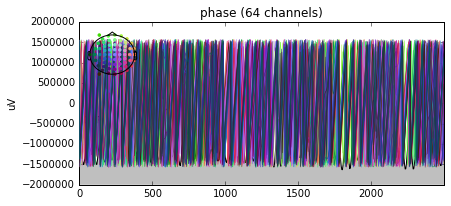

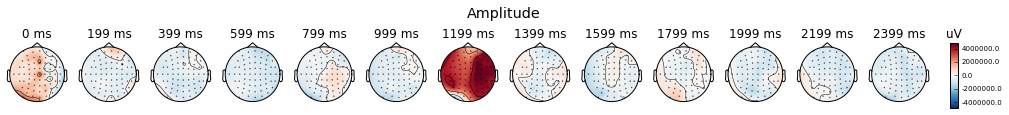

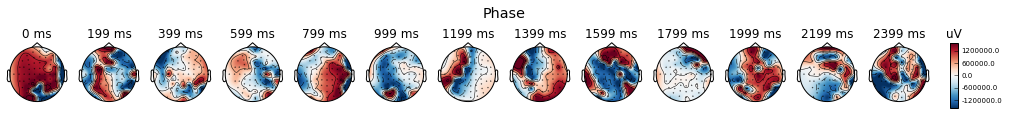

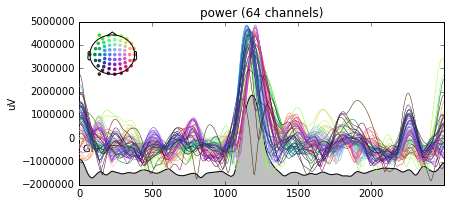

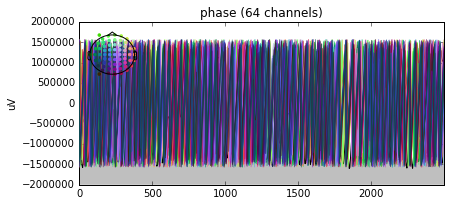

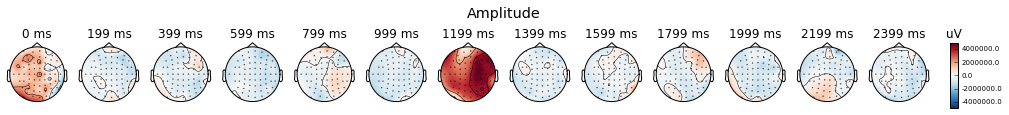

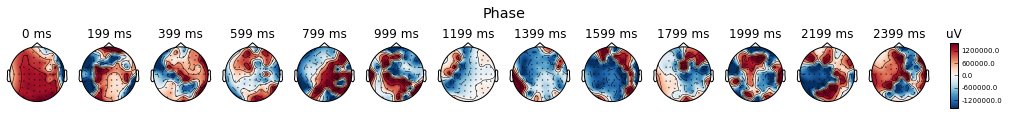

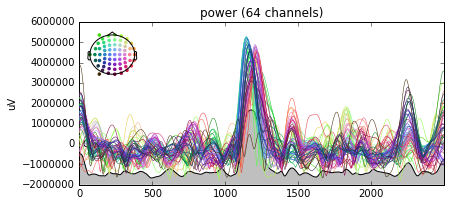

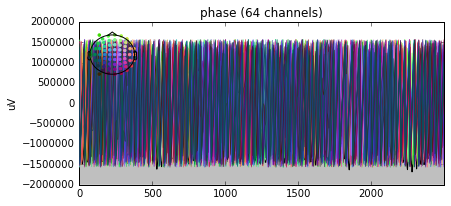

In [24]:
# Visualizing the convloved data with the wavelet kernel banks for filter banks
tmin, tmax = eeg['xmin'][0, 0], eeg['xmax'][0, 0]
times = np.arange(tmin, tmax, 0.2)
for each_APxCxT in data_KxAPxCxT:
#     print(each_APxCxT.shape)
    evoked_Amp = mne.EvokedArray(data=each_APxCxT[0], info=info) # ERP: Event related potential, average
    evoked_Phase = mne.EvokedArray(data=each_APxCxT[1], info=info) # ERP: Event related potential, average
    # times.shape, times + 1
    evoked_Amp.plot_topomap(times=times+1, title='Amplitude') # - channel {}'.format()
    evoked_Phase.plot_topomap(times=times+1, title='Phase')
    evoked_Amp.plot(spatial_colors=True, gfp=True, picks=picks, titles='power')    
    evoked_Phase.plot(spatial_colors=True, gfp=True, picks=picks, titles='phase')

In [25]:
# g) (Optional) Now consider the frequency range varies between 2Hz to 30Hz in two steps.
# Instead of constant cycle equivalent to 4 (what we had before), 
# consider variable cycles ranging between [3 10] cycle. 
# Based on your total number of frequencies, 
# you can define constant steps for your cycles where it starts from 3 cycles and ends at 10 cycles. 

# 3 would correspond to the minimum frequency (i.e. 2 Hz) and 10 would correspond to the maximum frequency 
# (i.e. 30 Hz).

# Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).

# Get the average of the powers over all the trials. 

# Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 

# The resulting matrix size would be 20 x 640. 

# Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 

# Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 

# Repeat the same process with fixed cycle 4 for all the frequencies.

# Compare your results between two conditions of fixed and variable cycles and explain your observations. 

f, w 2 2.5


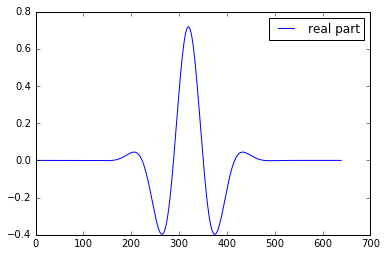

f, w 4 5.0


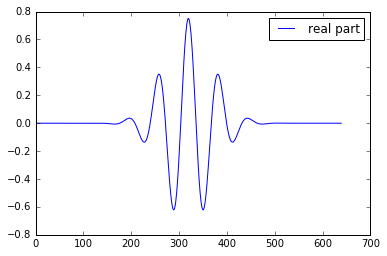

f, w 6 7.5


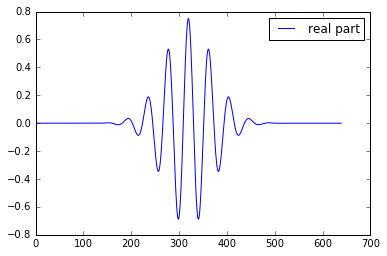

f, w 8 10.0


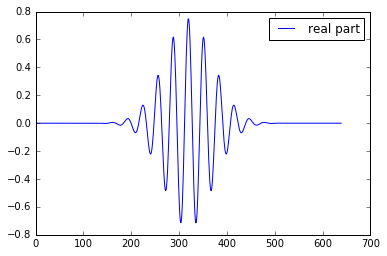

f, w 10 12.5


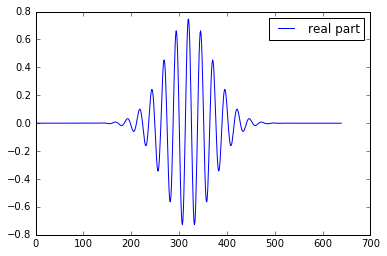

f, w 12 15.0


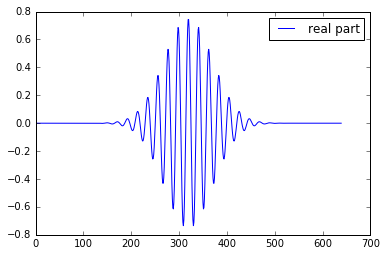

f, w 14 17.5


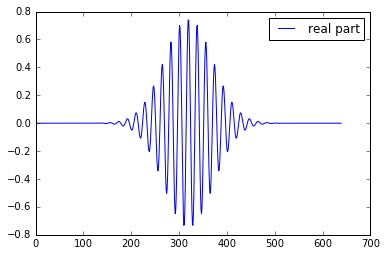

f, w 16 20.0


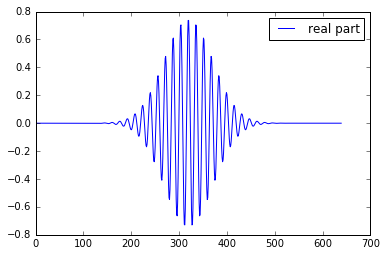

f, w 18 22.5


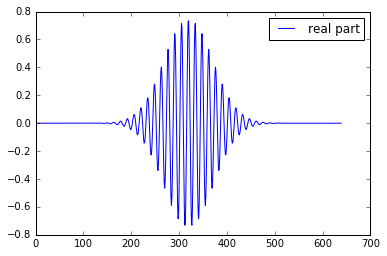

f, w 20 25.0


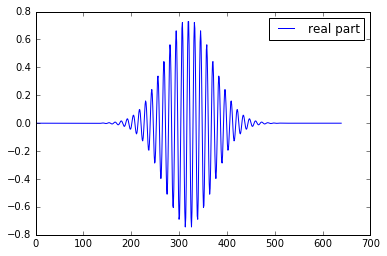

f, w 22 27.5


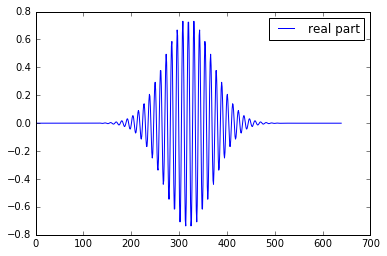

f, w 24 30.0


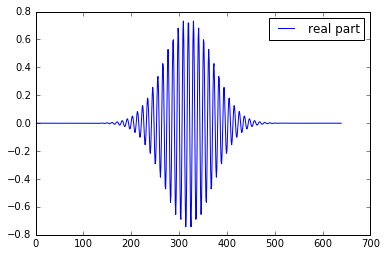

f, w 26 32.5


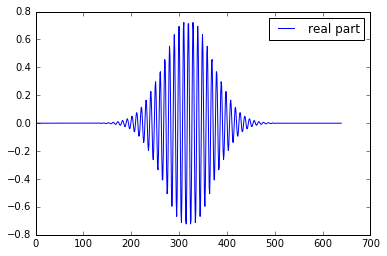

f, w 28 35.0


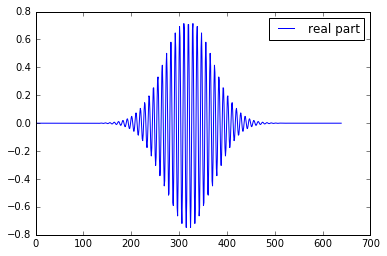

f, w 30 37.5


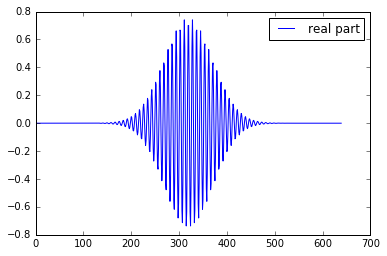

f, w 32 40.0


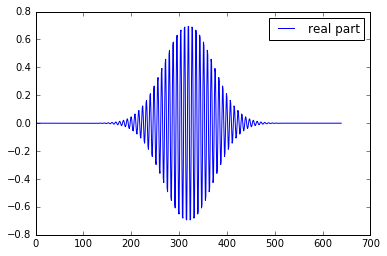

f, w 34 42.5


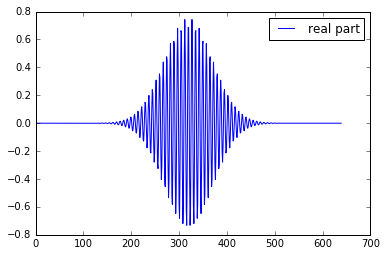

f, w 36 45.0


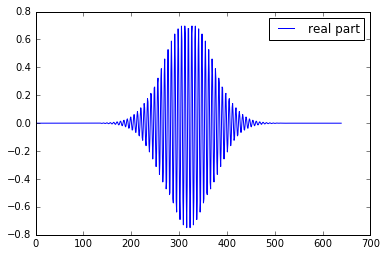

f, w 38 47.5


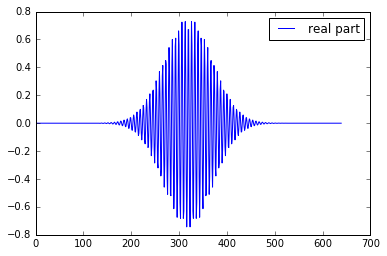

f, w 40 50.0


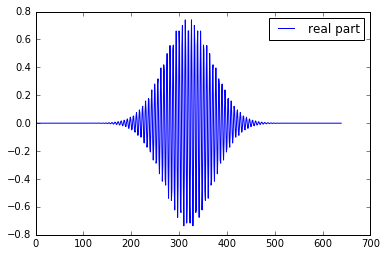

In [119]:
# r: Sampling rate of EEG and the length of EEG signal
# M: number of points in a channel should be equal to the EEG signal length
# s: constant number of cycles -2*pi*s to +2*pi*s
# f: Wavelet freq for activity  pattern recognition
# w: The number of cycles/ period of the phase/real part
r, s, w, M = eeg['srate'][0, 0], 1.0, 4.0, data2.shape[1]
wavelet_bank = []

def normalize(X):
    return (X - X.mean(axis=0))/ X.std(axis=0)

# Wavelet frequencies from 2 Hz to 30 Hz: 7 choices, 28 = 7 * 4
# Number of cycles from 3 cycles to 10 cycles: 7 choices
# for w in range(3, 11, 1): # including 3 and 10
# f = (2*s*r*w)/ M
for f in range(2, 42, 2): # start=2Hz, stop=42, step=2
    w = (f*M) / (2*s*r)
    print('f, w', f, w)

    wavelet = sp.signal.morlet(M=M, w=w, s=s, complete=True)
    wavelet_bank.append(wavelet)

    # Now calculate Amplitude & Phase
    A = ((wavelet.real**2) + (wavelet.imag**2))**0.5
    A_norm = normalize(X=A)
    P = np.arctan(wavelet.imag/wavelet.real) # imag=y, real=x
    P_norm = normalize(X=P)
    wavelet_real_norm = normalize(X=wavelet.real)
    wavelet_imag_norm = normalize(X=wavelet.imag)

    # plotting
    plt.plot(wavelet.real, label='real part')
#     plt.plot(wavelet.imag, label='imag part')
#     plt.plot(wavelet_real_norm, label='real part norm')
#     plt.plot(wavelet_imag_norm, label='imag part norm')
#     plt.plot(A, label='Amplitude part')
#     plt.plot(A_norm, label='Amplitude part norm')
#     plt.plot(P, label='Phase part')
#     plt.plot(P_norm, label='Phase part norm')
    plt.legend()
    plt.show()

In [26]:
# Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).
# Get the average of the powers over all the trials. 
# Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 
# The resulting matrix size would be 20 x 640. 
# Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 
# Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 
index = ch_names.index('FCz')
# data[index].shape
data_FCz = eeg['data'][index].T
data_FCz.shape, len(wavelet_bank)

((99, 640), 5)

In [2]:
#  Convolving the data with one wavelet, extracting real and imag part and calculate 
# Amplitude for time domain patterns and 
# Phase for frequency domain patterns
data_AxNxT = [] 
for each_wavelet in wavelet_bank:
    Amp = [] # Amplitude
    for each_trial in data_FCz: # for all channels
        b = np.convolve(a=each_trial, mode='same', v=each_wavelet)
        A = ((b.real**2) + (b.imag**2))**0.5
        A_norm = (A - A.mean(axis=0))/ A.std(axis=0)
        Amp.append(A_norm)
        
    data_AxNxT.append(Amp)
    
data_AxNxT = np.array(data_AxNxT)
data_AxNxT.shape # kx2xCxN: (7, 2, 448, 640)

NameError: name 'wavelet_bank' is not defined

In [85]:
# Get the average of the powers over all the trials. 
data_NxT = data_AxNxT.mean(axis=0)
data_NxT.shape

(99, 640)

In [87]:
# for each_data_T in data_NxT: # including 3 and 10
#     plt.plot(each_data_T, label='each data trial for one channel')
#     plt.legend()
#     plt.show()